# Drug Discovery
* finding more effective drug in HIV and Cancer

Data(continuous) Feature selection,
1. Feature selection-feature_pval, feature_neg_ic50_var, n_feature_neg, feature_ic50_t_pval, n_feature_pos, Feature Name, feature_pos_ic50_var, Drug ID, Target Pathway, fdr, log_ic50_mean_neg, feature_delta_mean_ic50, Drug target 
2. Target- ic50_effect_size

Regression algorithm, 
1. Linear Regression
2. Random Forest Regression

Model Tunning,
1. Grid search
2. Random search
3. Cross validation

# Data collection

In [1]:
import pandas as pd

In [2]:
file="D:\Data centr\Exel_data\int data\Drug_data\ANOVA_drugstructure.csv"
drug=pd.read_csv(file)
drug

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\himan\AppData\Local\Temp\ipykernel_15624\2595401914.py:1: SyntaxWarning: invalid escape sequence '\D'
  file="D:\Data centr\Exel_data\int data\Drug_data\ANOVA_drugstructure.csv"


,Drug name,Drug ID,Drug target,Target Pathway,Feature Name,n_feature_pos,n_feature_neg,ic50_effect_size,log_ic50_mean_pos,log_ic50_mean_neg,...,feature_ic50_t_pval,feature_delta_mean_ic50,feature_pos_ic50_var,feature_neg_ic50_var,feature_pval,tissue_pval,msi_pval,fdr,Tissue Type,Screening Set
0,Camptothecin,1003,TOP1,DNA replication,BRAF_mut,7,9,0.195421,-2.636756,-2.364783,...,0.696746,-0.271973,1.233768,1.499314,0.704013,NaN,NaN,0.000000,THCA,GDSC2
1,Camptothecin,1003,TOP1,DNA replication,NRAS_mut,3,13,0.103043,-2.600806,-2.456763,...,0.789126,-0.144043,0.556091,1.492728,0.874489,NaN,NaN,0.000000,THCA,GDSC2
2,Camptothecin,1003,TOP1,DNA replication,TP53_mut,11,5,0.493862,-2.693520,-2.022323,...,0.516005,-0.671197,0.957136,2.043171,0.375356,NaN,NaN,0.000000,THCA,GDSC2
3,Vinblastine,1004,Microtubule destabiliser,Mitosis,BRAF_mut,7,7,1.208547,-3.902313,-1.478744,...,0.048016,-2.423569,1.439966,2.443240,0.043134,NaN,NaN,0.000000,THCA,GDSC2
4,Vinblastine,1004,Microtubule destabiliser,Mitosis,TP53_mut,10,4,0.083904,-2.747887,-2.547131,...,0.899866,-0.200756,2.296656,2.660113,0.889573,NaN,NaN,0.000000,THCA,GDSC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,glutathione,2439,anti-oxidant proteins,Other,TP53_mut,10,4,1.170728,9.782948,8.796603,...,0.156151,0.986345,0.762811,1.045764,0.071242,NaN,NaN,0.000000,THCA,GDSC2
725,alpha-lipoic acid,2498,Metabolism,Metabolism,BRAF_mut,7,7,0.514371,7.992659,8.413229,...,0.354927,-0.420570,0.799091,0.835775,0.354890,NaN,NaN,0.000000,THCA,GDSC2
726,alpha-lipoic acid,2498,Metabolism,Metabolism,TP53_mut,10,4,0.246146,8.143690,8.351079,...,0.790235,-0.207389,0.542155,1.399189,0.684708,NaN,NaN,0.000000,THCA,GDSC2
727,N-acetyl cysteine,2499,Metabolism,Metabolism,BRAF_mut,7,7,0.456265,10.366953,10.070208,...,0.412002,0.296746,0.754533,0.525993,0.410046,NaN,NaN,82.009227,THCA,GDSC2


In [3]:
print(drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Drug name                729 non-null    object 
 1   Drug ID                  729 non-null    int64  
 2   Drug target              651 non-null    object 
 3   Target Pathway           725 non-null    object 
 4   Feature Name             729 non-null    object 
 5   n_feature_pos            729 non-null    int64  
 6   n_feature_neg            729 non-null    int64  
 7   ic50_effect_size         729 non-null    float64
 8   log_ic50_mean_pos        729 non-null    float64
 9   log_ic50_mean_neg        729 non-null    float64
 10  log_max_conc_tested      0 non-null      float64
 11  log_max_conc_tested_2    0 non-null      float64
 12  feature_ic50_t_pval      729 non-null    float64
 13  feature_delta_mean_ic50  729 non-null    float64
 14  feature_pos_ic50_var     7

# Data Statistics

In [4]:
drug.describe().T

,count,mean,std,min,25%,50%,75%,max
Drug ID,729.0,1586.717421,395.838548,1.003000e+03,1133.000000,1629.000000,1910.000000,2499.000000
n_feature_pos,729.0,7.278464,2.775103,3.000000e+00,7.000000,7.000000,10.000000,11.000000
n_feature_neg,729.0,7.278464,3.374613,3.000000e+00,5.000000,7.000000,9.000000,13.000000
ic50_effect_size,729.0,0.506895,0.423942,2.357518e-03,0.202754,0.414605,0.718827,5.255306
log_ic50_mean_pos,729.0,3.078876,2.538944,-5.731164e+00,2.106346,3.600376,4.833166,10.820421
log_ic50_mean_neg,729.0,3.470456,2.464238,-6.038549e+00,2.539563,3.965054,5.203400,10.678402
log_max_conc_tested,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
log_max_conc_tested_2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_ic50_t_pval,729.0,0.524623,0.296599,4.360000e-07,0.261863,0.550121,0.780840,0.996932
feature_delta_mean_ic50,729.0,-0.391580,0.760352,-3.881385e+00,-0.834684,-0.348769,0.066614,2.928332


In [5]:
drug.isnull().sum()

Drug name                    0
Drug ID                      0
Drug target                 78
Target Pathway               4
Feature Name                 0
n_feature_pos                0
n_feature_neg                0
ic50_effect_size             0
log_ic50_mean_pos            0
log_ic50_mean_neg            0
log_max_conc_tested        729
log_max_conc_tested_2      729
feature_ic50_t_pval          0
feature_delta_mean_ic50      0
feature_pos_ic50_var         0
feature_neg_ic50_var         0
feature_pval                 0
tissue_pval                729
msi_pval                   729
fdr                          0
Tissue Type                  0
Screening Set                0
dtype: int64

# Graph visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

array([[<Axes: title={'center': 'Drug ID'}>,
        <Axes: title={'center': 'n_feature_pos'}>,
        <Axes: title={'center': 'n_feature_neg'}>,
        <Axes: title={'center': 'ic50_effect_size'}>],
       [<Axes: title={'center': 'log_ic50_mean_pos'}>,
        <Axes: title={'center': 'log_ic50_mean_neg'}>,
        <Axes: title={'center': 'log_max_conc_tested'}>,
        <Axes: title={'center': 'log_max_conc_tested_2'}>],
       [<Axes: title={'center': 'feature_ic50_t_pval'}>,
        <Axes: title={'center': 'feature_delta_mean_ic50'}>,
        <Axes: title={'center': 'feature_pos_ic50_var'}>,
        <Axes: title={'center': 'feature_neg_ic50_var'}>],
       [<Axes: title={'center': 'feature_pval'}>,
        <Axes: title={'center': 'tissue_pval'}>,
        <Axes: title={'center': 'msi_pval'}>,
        <Axes: title={'center': 'fdr'}>]], dtype=object)

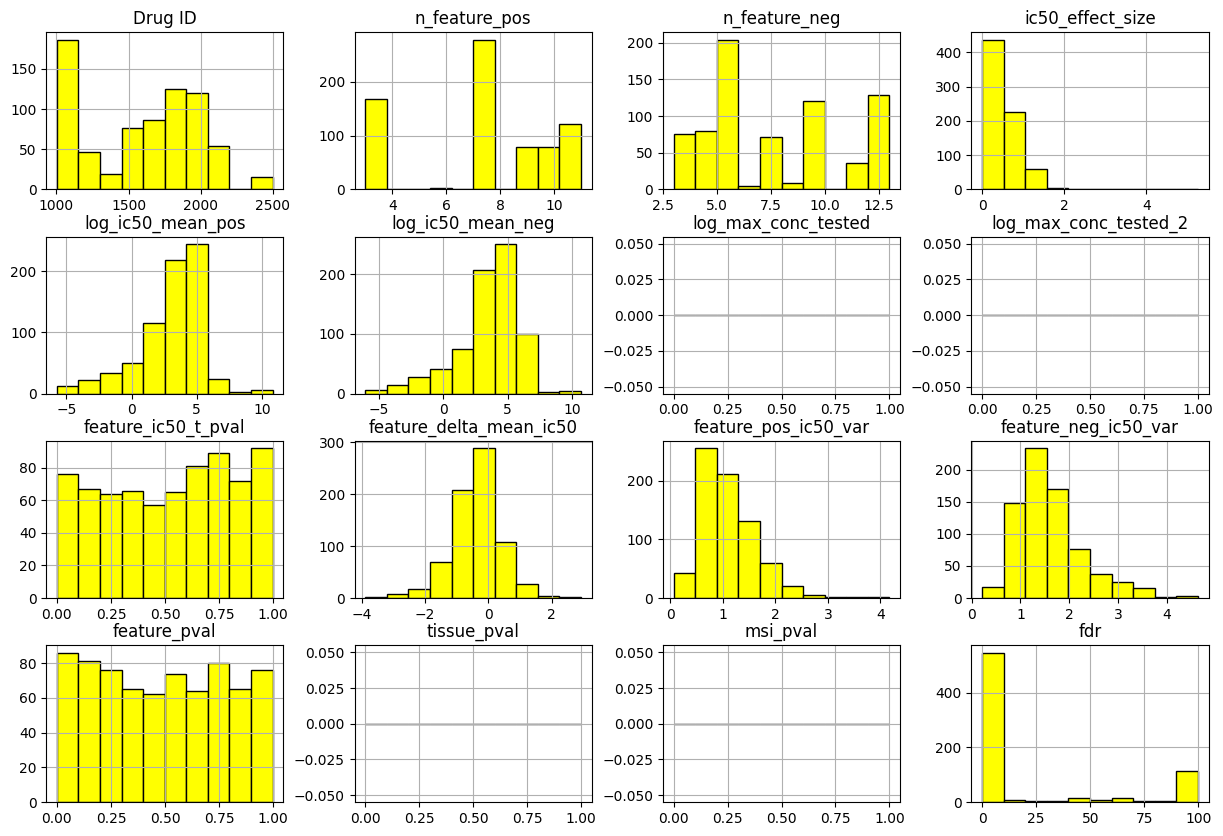

In [7]:
drug.hist(figsize=(15,10),bins=10,color="yellow",edgecolor='black')

In [8]:
# List of features for histograms
features = [
    'ic50_effect_size', 
    'n_feature_pos', 
    'n_feature_neg', 
    'log_ic50_mean_pos', 
    'log_ic50_mean_neg', 
    'feature_ic50_t_pval', 
    'feature_delta_mean_ic50', 
    'feature_pos_ic50_var', 
    'feature_neg_ic50_var'
]

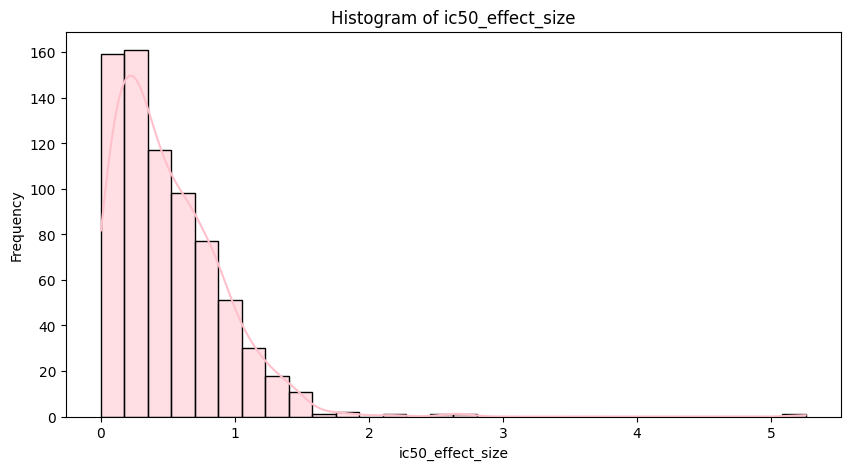

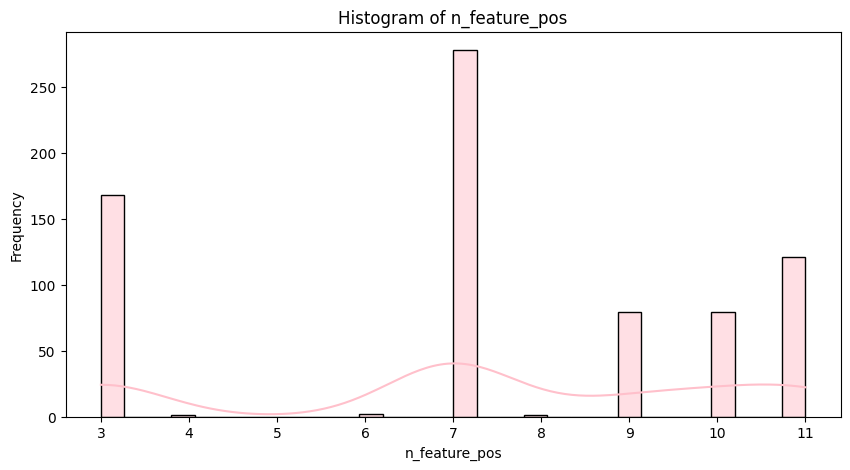

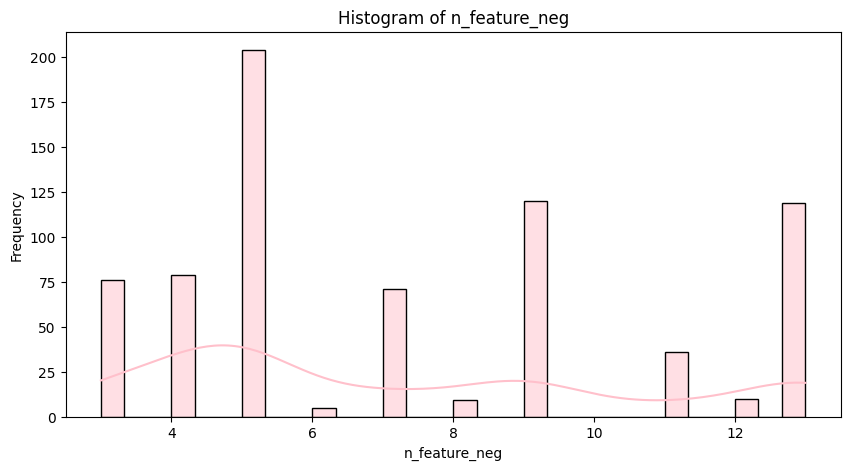

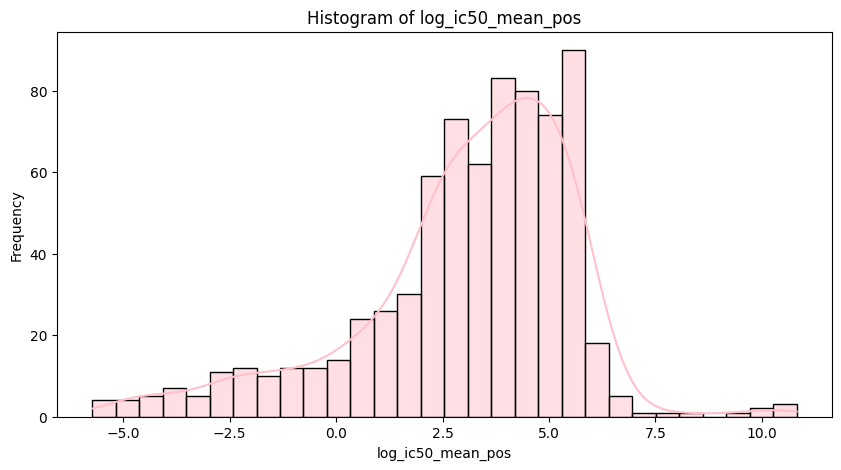

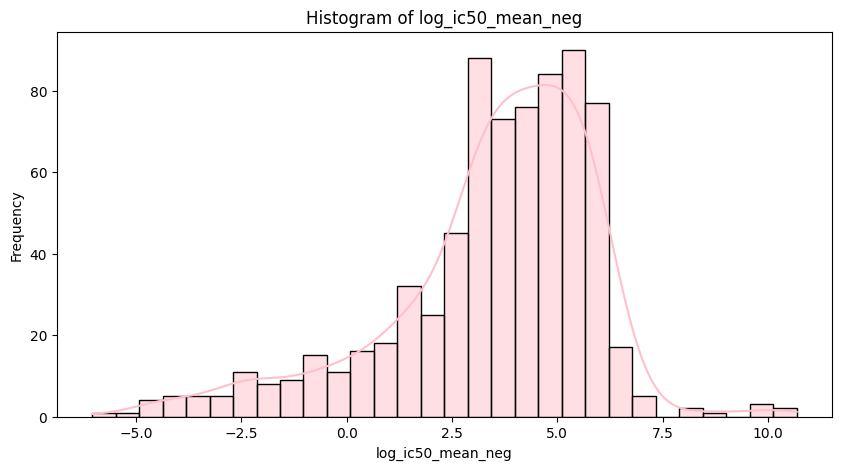

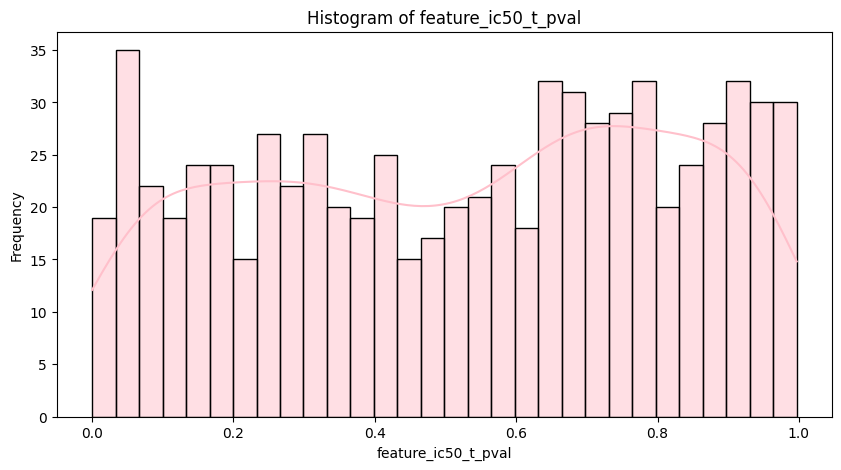

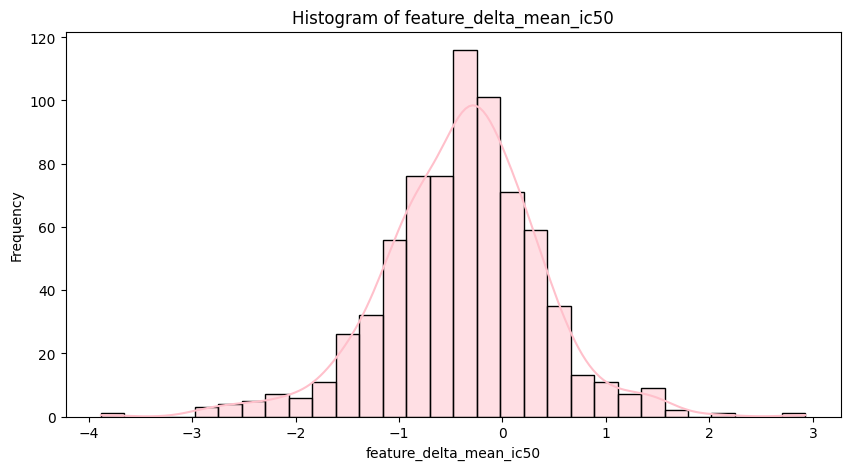

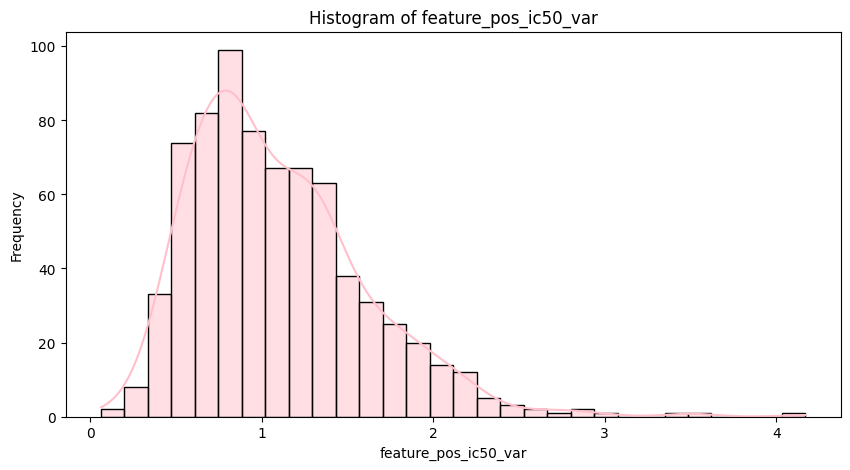

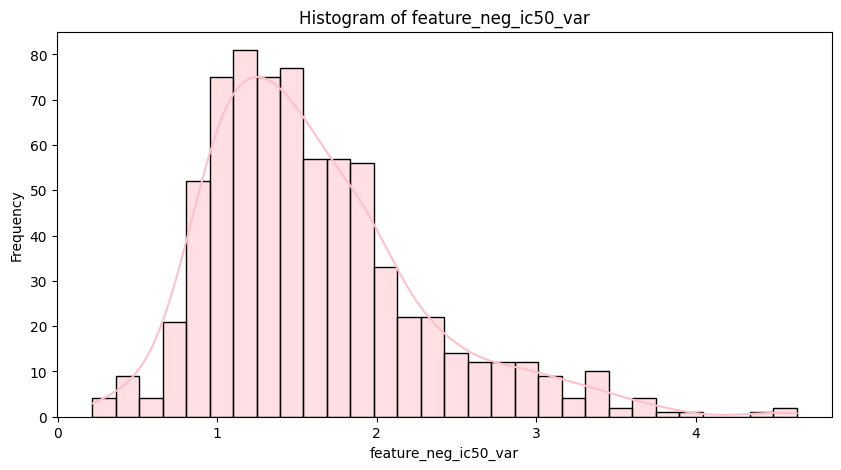

In [9]:
# Plot histograms
for feature in features:
    plt.figure(figsize=(10,5))
    sb.histplot(drug[feature], kde=True, bins=30,color='pink', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [10]:
# pairs of feature
pairs = [
    ('n_feature_pos', 'ic50_effect_size'),
    ('n_feature_neg', 'ic50_effect_size'),
    ('log_ic50_mean_pos', 'ic50_effect_size'),
    ('log_ic50_mean_neg', 'ic50_effect_size'),
    ('feature_delta_mean_ic50', 'ic50_effect_size'),
    ('feature_pos_ic50_var', 'ic50_effect_size')
]

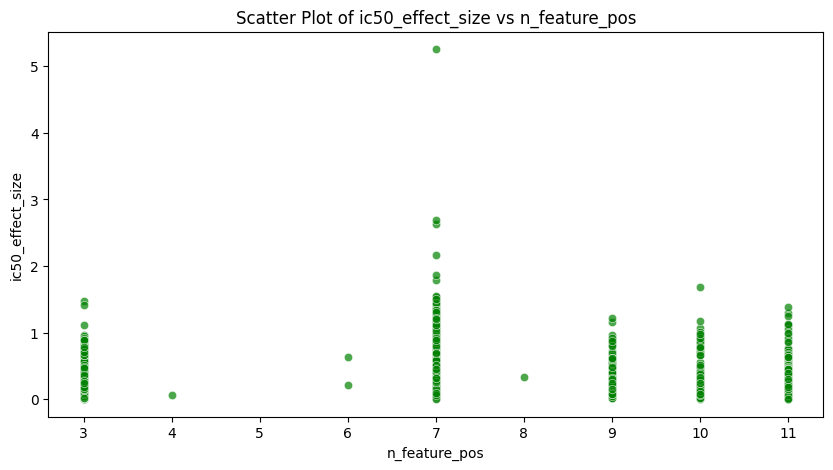

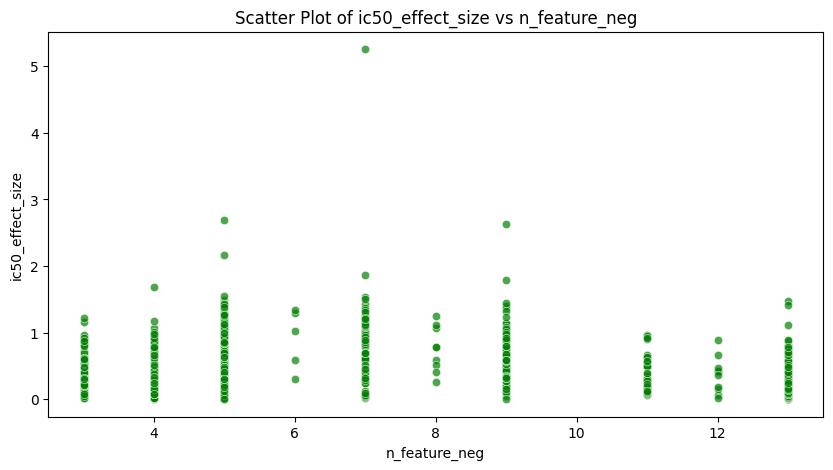

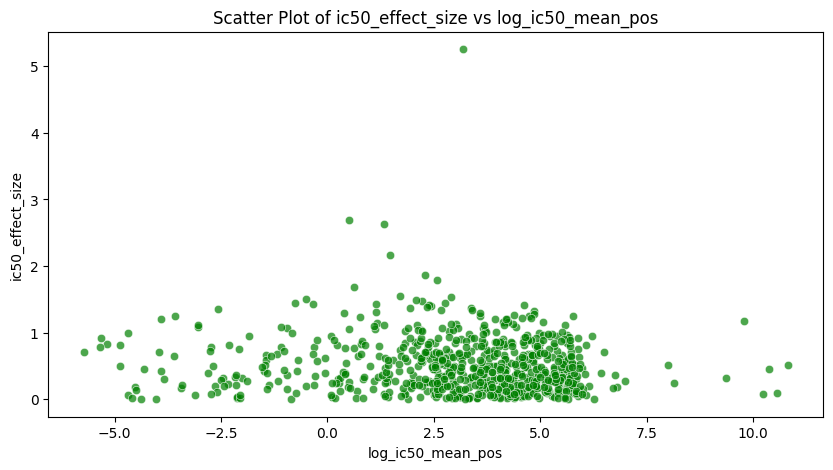

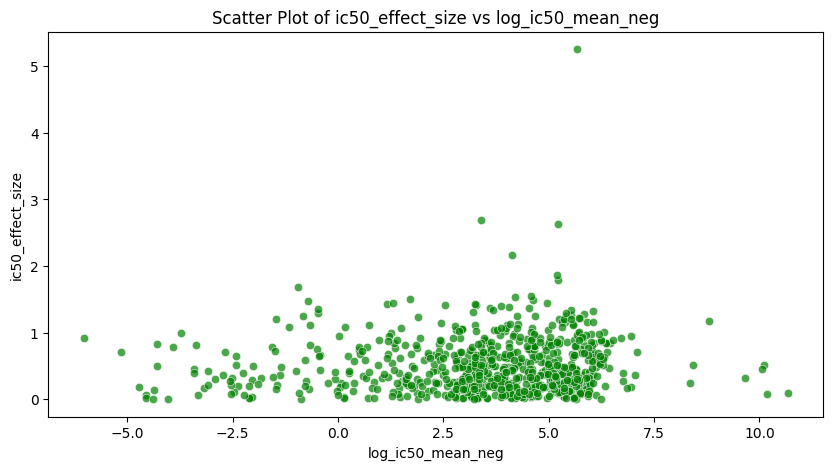

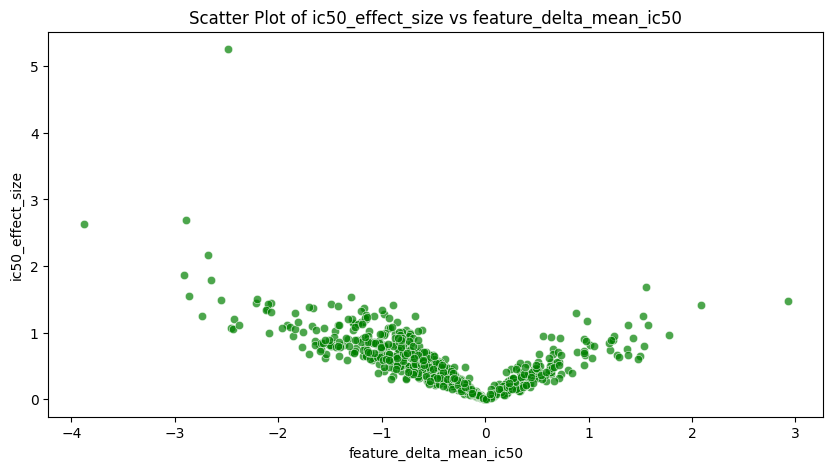

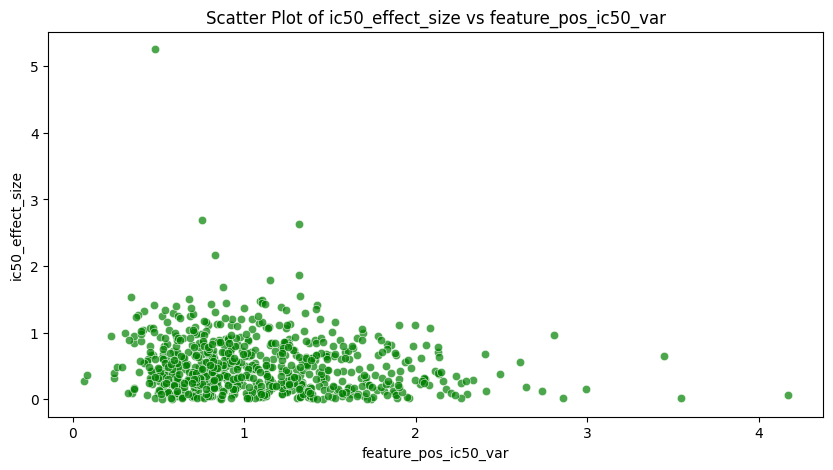

In [11]:
#plt.scatter(data=drug, x=feature_x, y=feature_y, alpha=0.7)
for (feature_x, feature_y) in pairs:
    plt.figure(figsize=(10, 5))
    sb.scatterplot(drug, x=feature_x, y=feature_y, alpha=0.7, color='green', edgecolor='white')
    plt.title(f'Scatter Plot of {feature_y} vs {feature_x}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.show()

<Figure size 1000x500 with 0 Axes>

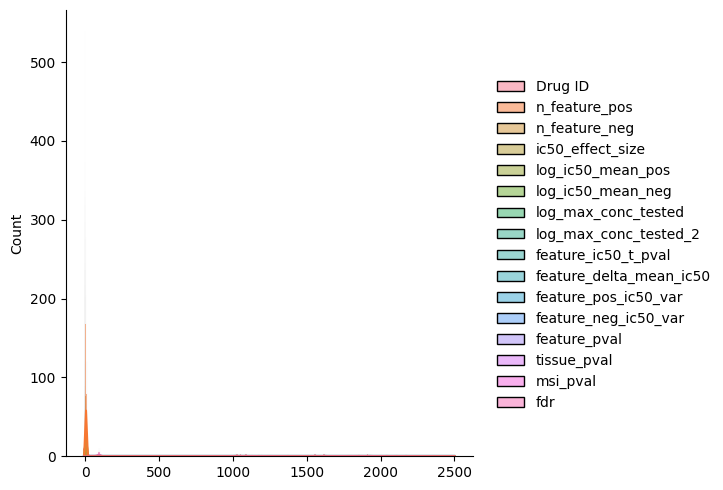

In [12]:
plt.figure(figsize=(10, 5))
sb.displot(drug,kde=True)
plt.show()

# Correlation Matrix

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
drug_encoded=drug.copy()
le=LabelEncoder()
corr_matrix=drug_encoded[features].corr()
print(corr_matrix)

                         ic50_effect_size  n_feature_pos  n_feature_neg  \
ic50_effect_size                 1.000000       0.028190      -0.077730   
n_feature_pos                    0.028190       1.000000      -0.872079   
n_feature_neg                   -0.077730      -0.872079       1.000000   
log_ic50_mean_pos               -0.088022       0.030104      -0.047721   
log_ic50_mean_neg                0.072115       0.031707      -0.061292   
feature_ic50_t_pval             -0.838342       0.014672      -0.017340   
feature_delta_mean_ic50         -0.527639      -0.002235       0.039294   
feature_pos_ic50_var            -0.151268      -0.230420       0.198320   
feature_neg_ic50_var            -0.079549       0.307203      -0.312289   

                         log_ic50_mean_pos  log_ic50_mean_neg  \
ic50_effect_size                 -0.088022           0.072115   
n_feature_pos                     0.030104           0.031707   
n_feature_neg                    -0.047721          -0

<Axes: ylabel='count'>

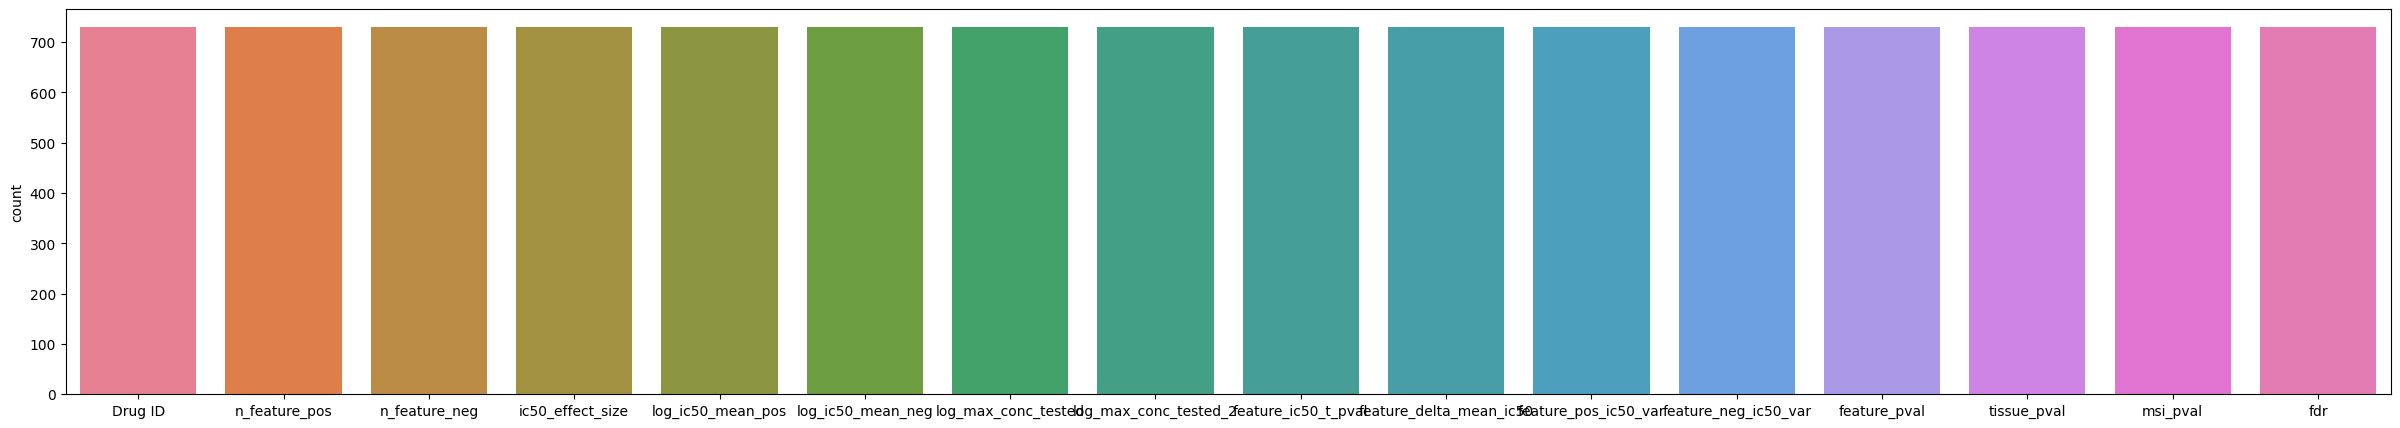

In [15]:
plt.figure(figsize=(30,5))
sb.countplot(drug_encoded)

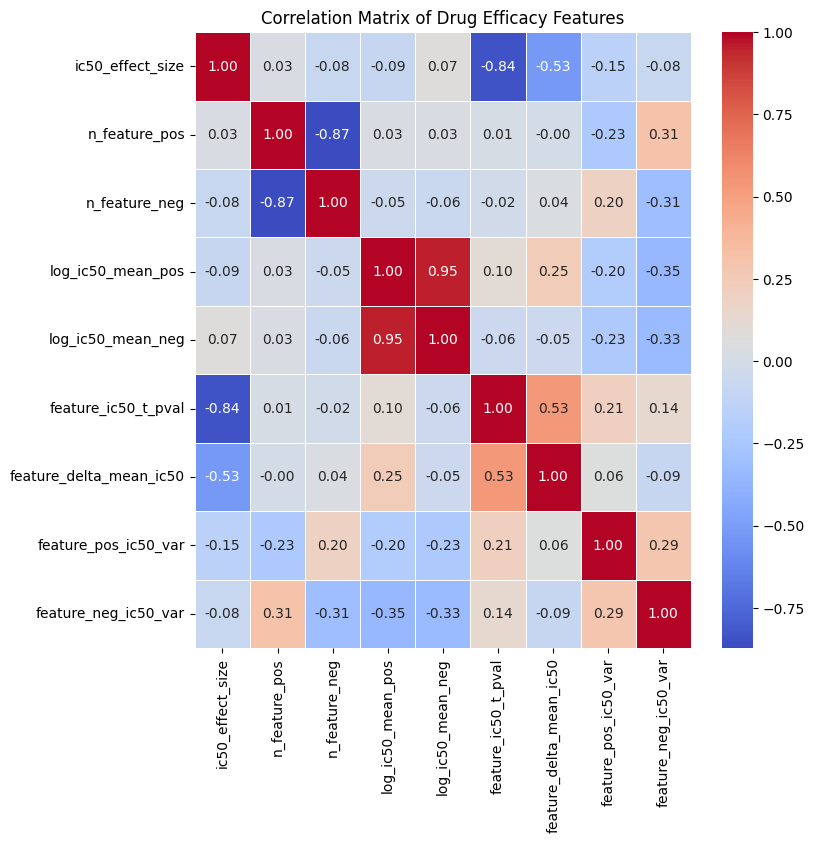

In [16]:
plt.figure(figsize=(8,8))
sb.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,linecolor='white')
plt.title("Correlation Matrix of Drug Efficacy Features")
plt.show()


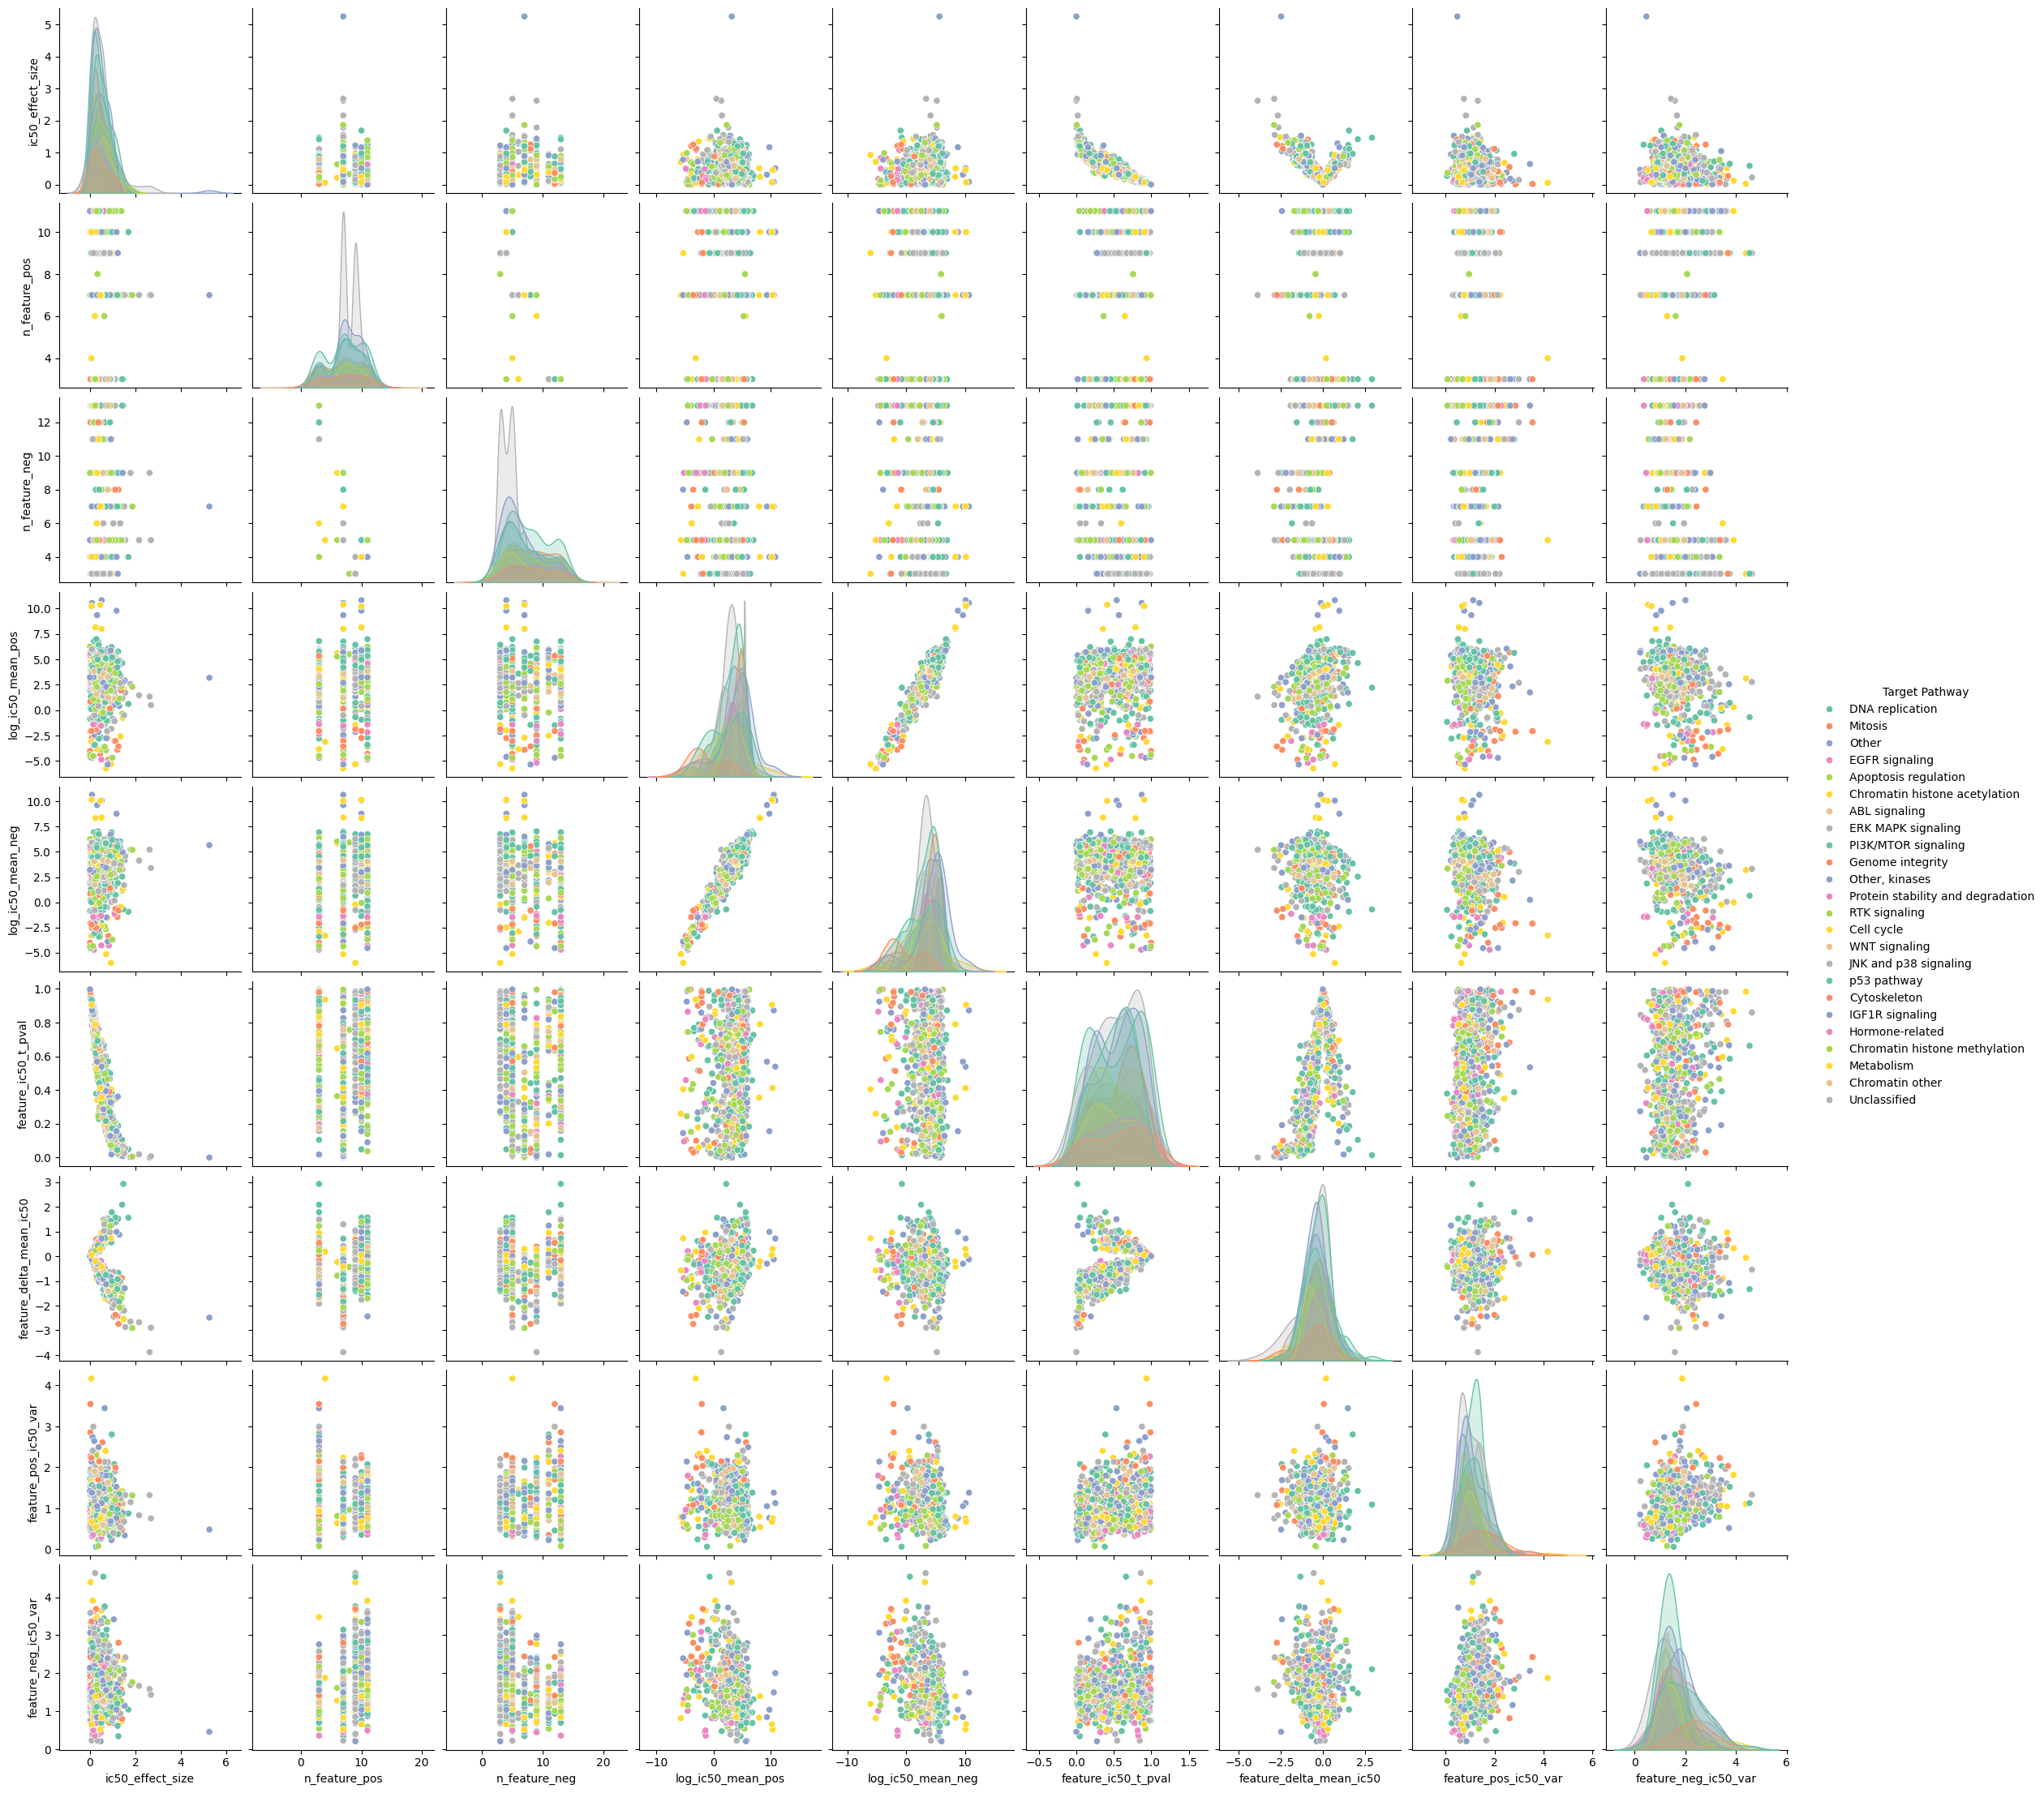

In [17]:
sb.pairplot(drug_encoded[features + ['Target Pathway']], hue='Target Pathway', palette='Set2')
plt.show()

# Data Preprocessing

Feature Selection

In [18]:
numerical_colmn=['n_feature_pos', 
            'n_feature_neg', 
            'ic50_effect_size', 
            'log_ic50_mean_pos', 
            'log_ic50_mean_neg', 
            'feature_ic50_t_pval', 
            'feature_delta_mean_ic50', 
            'feature_pos_ic50_var', 
            'feature_neg_ic50_var', 
            'feature_pval', 
            'fdr']

drug[numerical_colmn]=drug[numerical_colmn].fillna(drug[numerical_colmn].mean())

categorical_column =['Drug target', 
                     'Target Pathway', 
                     'Drug name', 
                     'Feature Name', 
                     'Tissue Type',
                     'Screening Set']

drug[categorical_column]=drug[categorical_column].fillna(drug[categorical_column].mode().iloc[0])

In [19]:
# Handle columns that are entirely NaN (e.g., log_max_conc_tested, tissue_pval, msi_pval)
drug['log_max_conc_tested'] = drug['log_max_conc_tested'].fillna(drug['log_max_conc_tested'].mean())
drug['log_max_conc_tested_2'] = drug['log_max_conc_tested_2'].fillna(drug['log_max_conc_tested_2'].mean())
drug['tissue_pval'] = drug['tissue_pval'].fillna(drug['tissue_pval'].mean())
drug['msi_pval'] = drug['msi_pval'].fillna(drug['msi_pval'].mean())

# Verify that all missing values have been filled
print(drug.isnull().sum())

Drug name                    0
Drug ID                      0
Drug target                  0
Target Pathway               0
Feature Name                 0
n_feature_pos                0
n_feature_neg                0
ic50_effect_size             0
log_ic50_mean_pos            0
log_ic50_mean_neg            0
log_max_conc_tested        729
log_max_conc_tested_2      729
feature_ic50_t_pval          0
feature_delta_mean_ic50      0
feature_pos_ic50_var         0
feature_neg_ic50_var         0
feature_pval                 0
tissue_pval                729
msi_pval                   729
fdr                          0
Tissue Type                  0
Screening Set                0
dtype: int64


In [20]:
drug.head()

,Drug name,Drug ID,Drug target,Target Pathway,Feature Name,n_feature_pos,n_feature_neg,ic50_effect_size,log_ic50_mean_pos,log_ic50_mean_neg,...,feature_ic50_t_pval,feature_delta_mean_ic50,feature_pos_ic50_var,feature_neg_ic50_var,feature_pval,tissue_pval,msi_pval,fdr,Tissue Type,Screening Set
0,Camptothecin,1003,TOP1,DNA replication,BRAF_mut,7,9,0.195421,-2.636756,-2.364783,...,0.696746,-0.271973,1.233768,1.499314,0.704013,NaN,NaN,0.0,THCA,GDSC2
1,Camptothecin,1003,TOP1,DNA replication,NRAS_mut,3,13,0.103043,-2.600806,-2.456763,...,0.789126,-0.144043,0.556091,1.492728,0.874489,NaN,NaN,0.0,THCA,GDSC2
2,Camptothecin,1003,TOP1,DNA replication,TP53_mut,11,5,0.493862,-2.693520,-2.022323,...,0.516005,-0.671197,0.957136,2.043171,0.375356,NaN,NaN,0.0,THCA,GDSC2
3,Vinblastine,1004,Microtubule destabiliser,Mitosis,BRAF_mut,7,7,1.208547,-3.902313,-1.478744,...,0.048016,-2.423569,1.439966,2.443240,0.043134,NaN,NaN,0.0,THCA,GDSC2
4,Vinblastine,1004,Microtubule destabiliser,Mitosis,TP53_mut,10,4,0.083904,-2.747887,-2.547131,...,0.899866,-0.200756,2.296656,2.660113,0.889573,NaN,NaN,0.0,THCA,GDSC2


# ML Algorithm (Model Training)

* for continuous data we use Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
x = drug_encoded.drop('ic50_effect_size', axis=1)  # Features
y = drug_encoded['ic50_effect_size']               # Target

Feature Importance Indices

In [23]:

for col in x.select_dtypes(include=['object']).columns:
    x[col] = le.fit_transform(x[col])

# Train a Decision Tree model
model = DecisionTreeRegressor()
model.fit(x, y)

# Get feature importance from the model
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.feature_importances_})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                    Feature  Importance
15             feature_pval    0.952085
12  feature_delta_mean_ic50    0.034699
6             n_feature_neg    0.004798
5             n_feature_pos    0.001879
11      feature_ic50_t_pval    0.001737
4              Feature Name    0.001064
13     feature_pos_ic50_var    0.000749
7         log_ic50_mean_pos    0.000722
3            Target Pathway    0.000582
14     feature_neg_ic50_var    0.000487
8         log_ic50_mean_neg    0.000327
2               Drug target    0.000323
18                      fdr    0.000294
1                   Drug ID    0.000234
0                 Drug name    0.000022
19              Tissue Type    0.000000
17                 msi_pval    0.000000
10    log_max_conc_tested_2    0.000000
16              tissue_pval    0.000000
9       log_max_conc_tested    0.000000
20            Screening Set    0.000000


# Feature Importance Visualize

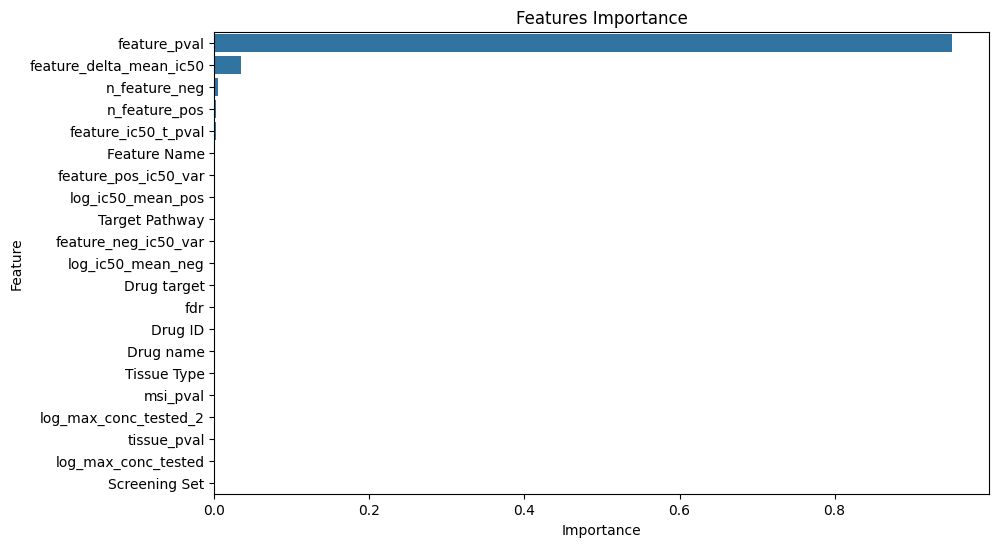

In [24]:
plt.figure(figsize=(10,6))
sb.barplot(x="Importance",y="Feature",data=feature_importance)
plt.title("Features Importance")
plt.show()

In [25]:
top_feature=feature_importance['Feature'].head(5)
x_selected=x[top_feature]

# Data Spliting

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [27]:
x_test

,Drug name,Drug ID,Drug target,Target Pathway,Feature Name,n_feature_pos,n_feature_neg,log_ic50_mean_pos,log_ic50_mean_neg,log_max_conc_tested,...,feature_ic50_t_pval,feature_delta_mean_ic50,feature_pos_ic50_var,feature_neg_ic50_var,feature_pval,tissue_pval,msi_pval,fdr,Tissue Type,Screening Set
120,200,1058,124,18,0,7,9,1.174356,2.451900,NaN,...,0.039486,-1.277545,1.086521,1.141423,0.039755,NaN,NaN,11.926549,0,0
353,121,1624,28,5,1,3,11,2.456348,3.155157,NaN,...,0.421876,-0.698809,1.124679,1.451377,0.458979,NaN,NaN,68.846890,0,0
341,108,1618,122,14,1,3,11,4.615247,3.993459,NaN,...,0.335745,0.621789,0.822627,1.030286,0.357987,NaN,NaN,0.000000,0,0
694,65,2158,56,4,0,7,7,3.970006,4.798596,NaN,...,0.133056,-0.828590,0.856912,1.051434,0.132014,NaN,NaN,0.000000,0,0
265,94,1511,15,7,2,11,5,-1.025137,-0.418551,NaN,...,0.576546,-0.606585,0.931775,2.172854,0.436259,NaN,NaN,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,18,1634,79,14,0,7,7,4.222009,5.372409,NaN,...,0.044609,-1.150400,1.043297,0.859287,0.043847,NaN,NaN,0.000000,0,0
579,99,1925,63,11,1,3,13,5.653713,5.363489,NaN,...,0.732179,0.290224,1.215868,1.134738,0.698686,NaN,NaN,98.362136,0,0
140,85,1069,141,6,1,3,13,4.148086,3.992545,NaN,...,0.783082,0.155541,0.732337,1.177635,0.832193,NaN,NaN,0.000000,0,0
62,234,1026,76,19,2,11,5,0.243176,-0.079130,NaN,...,0.713470,0.322306,0.590099,1.795991,0.589399,NaN,NaN,88.409851,0,0


In [28]:
x_train

,Drug name,Drug ID,Drug target,Target Pathway,Feature Name,n_feature_pos,n_feature_neg,log_ic50_mean_pos,log_ic50_mean_neg,log_max_conc_tested,...,feature_ic50_t_pval,feature_delta_mean_ic50,feature_pos_ic50_var,feature_neg_ic50_var,feature_pval,tissue_pval,msi_pval,fdr,Tissue Type,Screening Set
719,230,2362,111,18,0,7,7,4.197154,5.523164,NaN,...,0.044592,-1.326009,0.981739,1.208282,0.043723,NaN,NaN,0.000000,0,0
411,125,1738,82,12,2,9,3,3.361646,2.406903,NaN,...,0.425893,0.954743,1.217922,1.633979,0.300538,NaN,NaN,60.107656,0,0
712,215,2177,50,4,2,11,5,2.287091,2.573515,NaN,...,0.707266,-0.286424,0.556322,1.555003,0.586924,NaN,NaN,0.000000,0,0
166,130,1088,154,7,0,7,9,2.891946,3.541509,NaN,...,0.479227,-0.649563,1.259495,2.261188,0.508096,NaN,NaN,0.000000,0,0
106,41,1051,11,15,1,3,13,2.304914,2.718832,NaN,...,0.523571,-0.413918,0.706654,1.691873,0.690381,NaN,NaN,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,38,1803,174,21,0,7,5,5.910602,4.617424,NaN,...,0.292485,1.293178,2.133963,1.864556,0.302258,NaN,NaN,0.000000,0,0
165,50,1086,131,2,2,11,5,0.300095,-0.023015,NaN,...,0.867173,0.323110,1.815983,3.908542,0.820590,NaN,NaN,0.000000,0,0
7,74,1006,16,16,0,7,7,2.390725,2.951333,NaN,...,0.621082,-0.560608,2.157536,1.971562,0.621008,NaN,NaN,0.000000,0,0
219,79,1248,113,14,0,3,6,-3.837401,-2.924370,NaN,...,0.596954,-0.913031,1.449171,3.478878,0.683824,NaN,NaN,92.870557,0,0


In [29]:
y_test

120    1.142477
353    0.498358
341    0.622611
694    0.863909
265    0.432274
         ...   
376    1.203686
579    0.253099
140    0.138275
62     0.297931
196    0.271332
Name: ic50_effect_size, Length: 146, dtype: float64

In [30]:
y_train

719    1.204528
411    0.727848
712    0.299935
166    0.342276
106    0.260493
         ...   
440    0.636878
165    0.124639
7      0.271265
219    0.300288
326    0.162784
Name: ic50_effect_size, Length: 583, dtype: float64

# Model Selection
Data is continuous, Here we use Regression algorithm.

* Remove missing values

In [31]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_test)

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['log_max_conc_tested' 'log_max_conc_tested_2' 'tissue_pval' 'msi_pval']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['log_max_conc_tested' 'log_max_conc_tested_2' 'tissue_pval' 'msi_pval']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

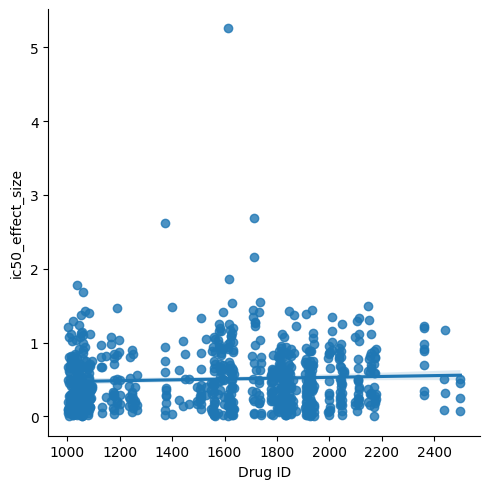

In [33]:
sb.lmplot(x='Drug ID',y='ic50_effect_size',data= drug)

Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred_reg=reg_model.predict(x_test)
MSE_lr = mean_squared_error(y_test, y_pred_reg)
MAE_lr = mean_absolute_error(y_test, y_pred_reg)
r2_lr = r2_score(y_test, y_pred_reg)

print("Mean Squared Error (MSE_lr):", MSE_lr)
print("Mean Absolute Error (MAE_lr):", MAE_lr)
print("R² Score:", r2_lr)

Mean Squared Error (MSE_lr): 0.0461313097775109
Mean Absolute Error (MAE_lr): 0.10735795642572304
R² Score: 0.7698560721444926


Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import label_binarize

In [38]:
# Train a Random Forest classifier
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
# Make predictions
y_pred_clf = clf.predict(x_test)

# Evaluate the model for regression
MSE_rfr = mean_absolute_error(y_test, y_pred_clf)
MAE_rfr = mean_squared_error(y_test, y_pred_clf)
r2_rfr = r2_score(y_test, y_pred_clf)

print("Mean Squared Error (MSE_rfr):", MSE_rfr)
print("Mean Absolute Error (MAE_rfr):", MAE_rfr)
print("R² Score:", r2_rfr)


Mean Squared Error (MSE_rfr): 0.03155106078890405
Mean Absolute Error (MAE_rfr): 0.005770881208959145
R² Score: 0.9712097212278836


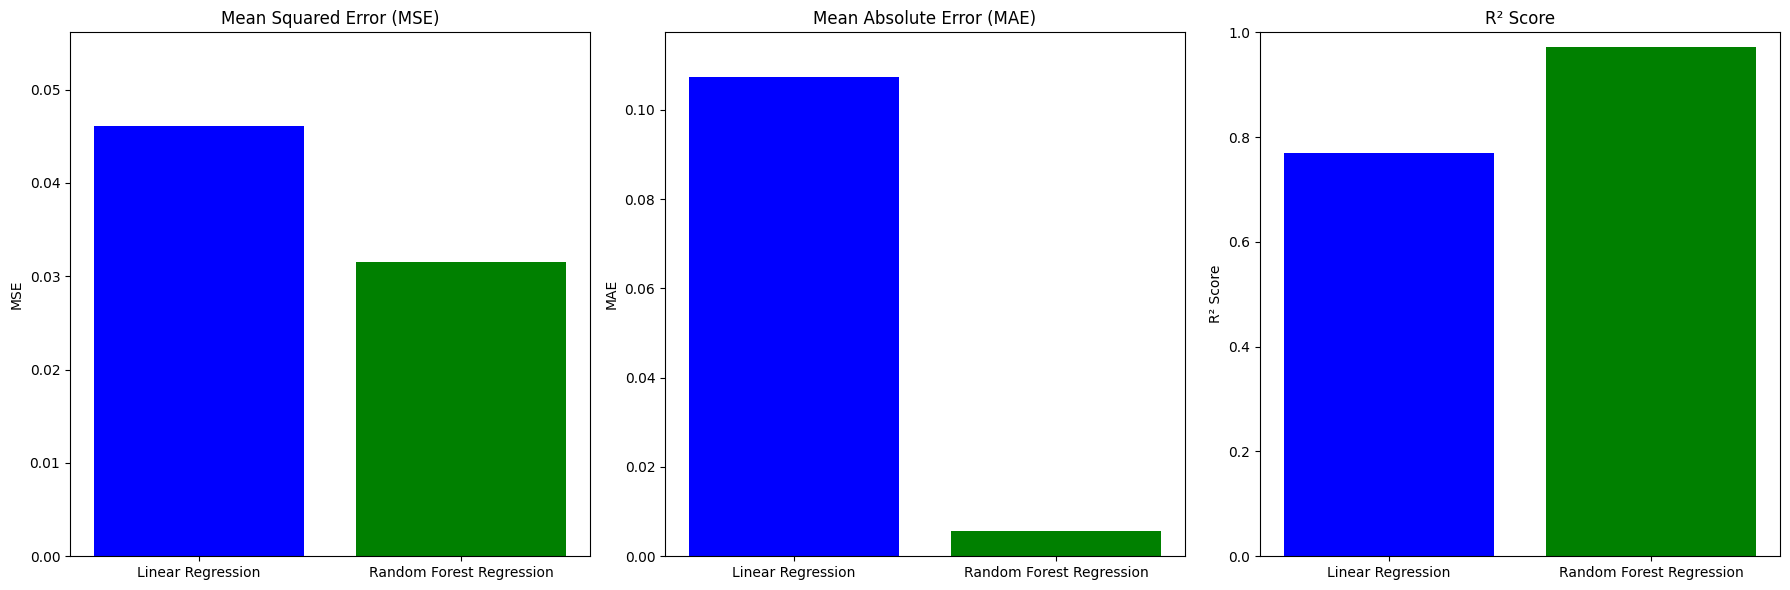

In [40]:
labels = ['Linear Regression', 'Random Forest Regression']
MSE_values = [MSE_lr, MSE_rfr]
MAE_values = [MAE_lr, MAE_rfr]
R2_values = [r2_lr, r2_rfr]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
# MSE plot
ax[0].bar(labels, MSE_values, color=['blue', 'green'])
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_ylabel('MSE')
ax[0].set_ylim([0, max(MSE_values) + 0.01])

# MAE plot
ax[1].bar(labels, MAE_values, color=['blue', 'green'])
ax[1].set_title('Mean Absolute Error (MAE)')
ax[1].set_ylabel('MAE')
ax[1].set_ylim([0, max(MAE_values) + 0.01])

# R² Score plot
ax[2].bar(labels, R2_values, color=['blue', 'green'])
ax[2].set_title('R² Score')
ax[2].set_ylabel('R² Score')
ax[2].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Model Tunning
Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid={
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
grid_search=GridSearchCV(estimator=clf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)

In [44]:
# Train the model using Grid Search
grid_search.fit(x_train, y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.9068615390513555


In [45]:
best_model = grid_search.best_estimator_
test_score_grid = best_model.score(x_test, y_test)
print(f"Test Set Accuracy: {test_score_grid}")

Test Set Accuracy: 0.9590613932032757


Random search

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, verbose=2)

In [48]:
random_search.fit(x_train, y_train)
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best Cross-Validation Score: 0.9053522788522137


In [49]:
best_model_random = random_search.best_estimator_
test_score_random = best_model_random.score(x_test, y_test)
print(f"Test Set Accuracy: {test_score_random}")

Test Set Accuracy: 0.9633994709511894


Cross- Validation

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
cv_mean=cv_scores.mean()
print(f"Mean CV Score: {cv_mean}")

Cross-Validation Scores: [0.64338882 0.97222684 0.98475794 0.95829309 0.9468428 ]
Mean CV Score: 0.9011018977429177


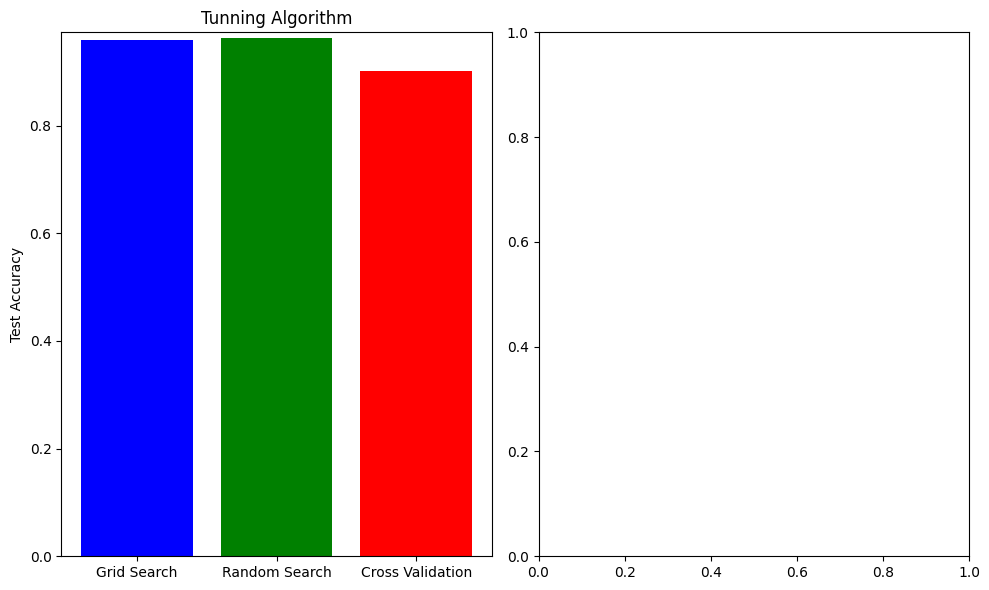

In [52]:
labels = ['Grid Search', 'Random Search','Cross Validation']
Test_Accuracy = [test_score_grid, test_score_random,cv_mean]


fig, ax = plt.subplots(1,2, figsize=(10, 6))
# MSE plot
ax[0].bar(labels, Test_Accuracy, color=['blue', 'green','red'])
ax[0].set_title('Tunning Algorithm')
ax[0].set_ylabel('Test Accuracy')
ax[0].set_ylim([0, max(Test_Accuracy) + 0.01])

plt.tight_layout()
plt.show()

# Model Deployement
* tflite format, joblib

In [53]:
import joblib
import tensorflow as tf
import numpy as np

In [54]:
joblib.dump(best_model_random,"drug_effectiveness_model.pkl")

['drug_effectiveness_model.pkl']

In [55]:
print(len(set(y_train))) # Check unique values in y_train
print(len(set(y_test)))    # Check unique values in y_test

583
146


* Fully Connected Neural Network Model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
model_tensorflow = Sequential()   #  simplest ways to create neural networks in Keras, where layers are linear stacked on top of each other.
model_tensorflow.add(Dense(64, input_dim=x_train.shape[1], activation='relu')) # add layers to the model
model_tensorflow.add(Dense(32, activation='relu'))  # fully connected (dense) layer, meaning every neuron in the previous layer is connected to every neuron in the current layer.
model_tensorflow.add(Dense(1, activation='linear')) # neurons in this hidden layer is 64.Relu-transforms negative values to 0 and keeps positive values unchanged.
# linear, meaning no transformation is applied to the output;
model_tensorflow.compile(optimizer=Adam(), loss='mean_squared_error') #Adam optimizer is an adaptive optimization algorithm that computes adaptive learning rates for each parameter.

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
History = model_tensorflow.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss = model_tensorflow.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1512 - val_loss: 0.0387
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0564 - val_loss: 0.0342
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0379 - val_loss: 0.0261
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0838 - val_loss: 0.0220
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0248 - val_loss: 0.0213
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - val_loss: 0.0216
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - val_loss: 0.0185
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - val_loss: 0.0189
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0252 - val_loss: 0.0183
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - val_loss: 0.0178
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - val_loss: 0.0197
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0312 - val_l

In [59]:
# Save the model
model_tensorflow.save("drug_effectiveness.h5")

In [60]:
converter=tf.lite.TFLiteConverter.from_keras_model(model_tensorflow)
tflite_model=converter.convert()

with open('drug_effectiveness.tflite','wb') as f:
    f.write(tflite_model)
    print(help(tf.lite.TFLiteConverter))

INFO:tensorflow:Assets written to: C:\Users\himan\AppData\Local\Temp\tmp6ku00fuh\assets


INFO:tensorflow:Assets written to: C:\Users\himan\AppData\Local\Temp\tmp6ku00fuh\assets


Saved artifact at 'C:\Users\himan\AppData\Local\Temp\tmp6ku00fuh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 17), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1991238803600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1991238804368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1991238803984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1991238804944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1991238805136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1991238804176: TensorSpec(shape=(), dtype=tf.resource, name=None)
Help on class TFLiteConverterV2 in module tensorflow.lite.python.lite:

class TFLiteConverterV2(TFLiteFrozenGraphConverterV2)
 |  TFLiteConverterV2(funcs, trackable_obj=None)
 |
 |  Converts a TensorFlow model into TensorFlow Lite model.
 |
 |  Attributes:
 |    optimizations: Experiment

# Model Prediction

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model_tensorflow.predict(x_test)

# If you have continuous targets, ensure y_pred and y_test are aligned
# Calculate regression metrics
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test R² Score: {test_r2}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test Mean Absolute Error (MAE): 0.08405053618367106
Test Mean Squared Error (MSE): 0.012813927843100856
Test R² Score: 0.9360727519055627


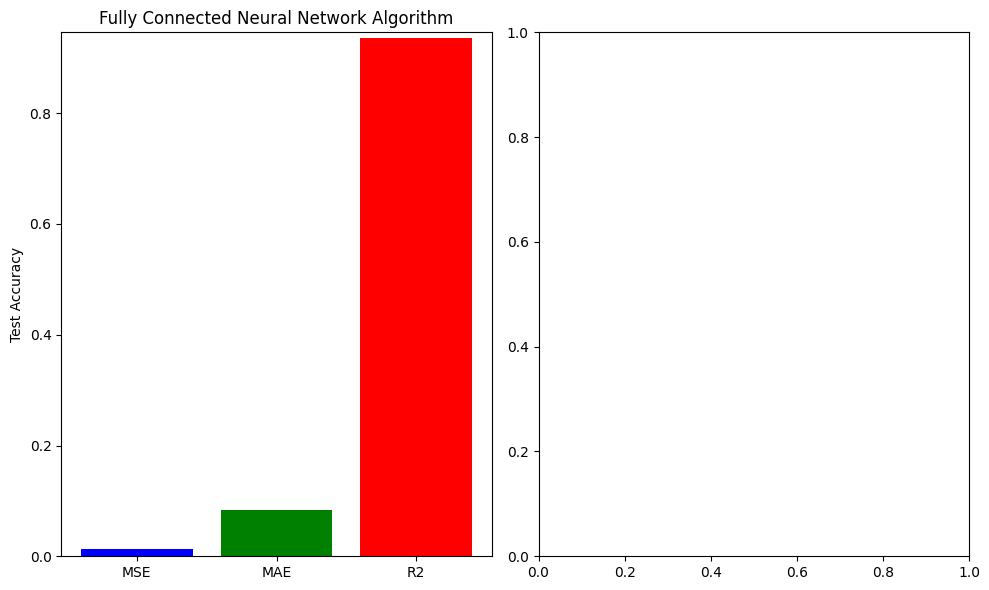

In [62]:
labels=['MSE','MAE','R2']
Test_Accuracy=[test_mse,test_mae,test_r2]

fig, ax=plt.subplots(1,2, figsize=(10,6))

ax[0].bar(labels, Test_Accuracy, color=['blue','green','red'])
ax[0].set_title('Fully Connected Neural Network Algorithm')
ax[0].set_ylabel('Test Accuracy')
ax[0].set_ylim([0, max(Test_Accuracy) + 0.01])

plt.tight_layout()
plt.show()


In [63]:
import torch
input_tensor = torch.randn(1, 17)  # Example tensor with shape (1, 17)
print(input_tensor) # 1 batch size, 17 features that model expects

tensor([[ 2.5706,  0.3086, -0.0337, -0.1021, -1.2816, -0.2872, -2.4005, -1.9115,
          0.8353,  0.6987,  0.8557,  2.3705,  0.9189, -0.9050,  0.3988,  0.3981,
          1.0253]])


In [64]:
print(input_tensor.shape)  # combined array (drug name + numerical features) must have 17 elements


torch.Size([1, 17])


In [65]:
# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="drug_effectiveness.tflite")
interpreter.allocate_tensors() # Allocates memory for the model's input and output tensors

# Get input and output tensors
input_details = interpreter.get_input_details() # Shape, Data type, Index
output_details = interpreter.get_output_details()

# Prepare new input data (replace with your data)
new_data_tflite = np.array([[-1.8653,  2.3106,  0.3982,  0.6221, -0.0886,  0.4502,  0.8476,  0.3480, 0.0992, -0.4730,  0.1709, -3.2441,  0.4826,  0.5644, -1.1889, -1.0514, 0.3332]], dtype=np.float32)
# [3.5, 2.1, 0.85, ...] represent features or variables that the model uses to make predictions

# Perform inference
interpreter.set_tensor(input_details[0]['index'], new_data_tflite) #input data (as a NumPy array) to index of the input tensor to which the data should be assigned
interpreter.invoke() #  model processes the input tensor, applies its trained parameters (weights and biases), and generates predictions
predicted_values = interpreter.get_tensor(output_details[0]['index']) 

print("Predicted IC50 Effectiveness (TFLite):", predicted_values)


Predicted IC50 Effectiveness (TFLite): [[0.48762965]]
